In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

5
0
4
1
9
2
1
3
1


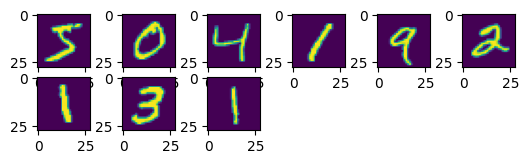

In [3]:
for i in range(9):
	# define subplot
	plt.subplot(660 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])
	print(training_labels[i])
	


In [4]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [22]:
class Stop_Training(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs={}):
        if(logs.get('accuracy')>=0.95):
            print("Accuracy is more than 95%")
            self.model.stop_training=True
callback=Stop_Training()

In [23]:
model.fit(training_images, training_labels, epochs=5,callbacks=[callback])

Epoch 1/5
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0559Accuracy is more than 95%
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0559


In [24]:
print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.0942
[0.08229353278875351, 0.974399983882904]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1


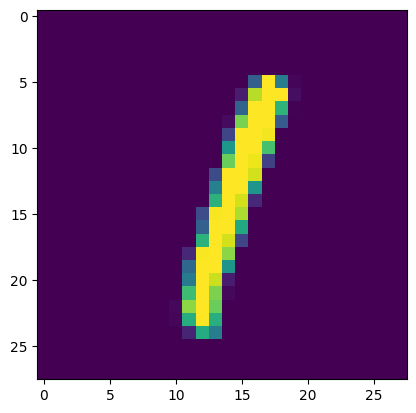

In [25]:
plt.imshow(test_images[5])
prediction=model.predict(test_images)
print(np.argmax(prediction[5]))